IRIS DATASET



In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
iris = load_iris()
x=iris.data
y=iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

(i) Hold Out Method, Test size = 25%

In [4]:
k_size = 0.25
r_seeds = 100
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = k_size, random_state=r_seeds)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (112, 4)
Shape of X_test:  (38, 4)
Shape of y_train:  (112,)
Shape of y_test:  (38,)


Decision Tree Classification

In [5]:
deci_tree = DecisionTreeClassifier(criterion='entropy')
deci_tree.fit(X_train, y_train)
prediction = deci_tree.predict(X_test)

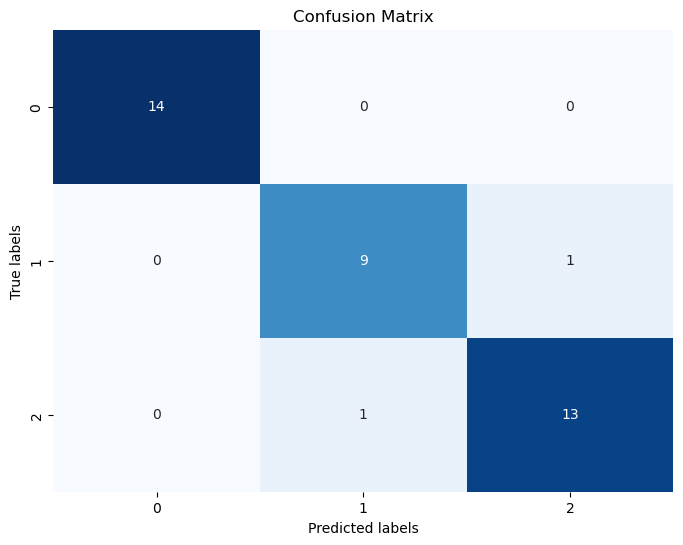

In [6]:
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.4, 0.9, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [36, 40, 36]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.998\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\nentropy = 0.371\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

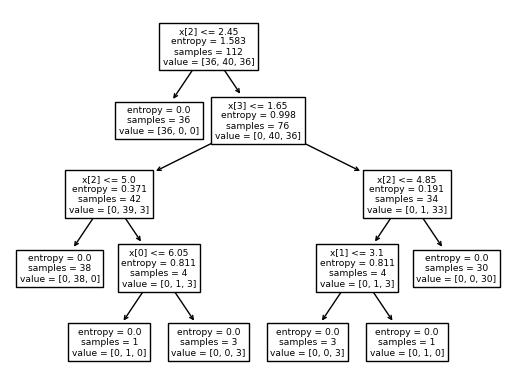

In [7]:
plot_tree(deci_tree)

In [8]:
accuracy_dt = accuracy_score(y_test, prediction)
print("Accuracy on Hold Out method using classification:", accuracy_dt*100,"%")

report = classification_report(y_test, prediction)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 94.73684210526315 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



KNearest Neighbour Classification

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [10]:
accuracy_knn = accuracy_score(y_test, prediction2)
print("Accuracy on Hold Out method using classification:", accuracy_knn*100,"%")

report = classification_report(y_test, prediction2)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 97.36842105263158 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Naive Bayes

In [11]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
prediction3 = nb.predict(X_test)

In [13]:
accuracy_nb = accuracy_score(y_test, prediction3)
print("Accuracy on Hold Out method using classification:", accuracy_nb*100,"%")

report = classification_report(y_test, prediction3)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 94.73684210526315 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



(ii) Random Subsampling, Test Size = 25%

In [14]:
iris = load_iris()
x = iris.data
y = iris.target

acc=[]
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=30)

    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    
print(acc)


[0.9666666666666667, 0.9666666666666667, 0.9, 1.0, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333]


In [15]:
print("Average accuracy of K-NN using Random Subsampling is ", np.mean(acc)*100)

Average accuracy of K-NN using Random Subsampling is  95.0


Decision Tree Classification

In [16]:
acc=[]
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=30)

    
    deci_tree1 = DecisionTreeClassifier(criterion='entropy')
    deci_tree1.fit(X_train, y_train)

    y_pred = deci_tree1.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    
print(acc)


[0.9333333333333333, 0.9, 1.0, 0.9, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


In [17]:
print("Average accuracy of Decision Tree using Random Subsampling is ", np.mean(acc)*100)

Average accuracy of Decision Tree using Random Subsampling is  93.66666666666667


In [18]:
acc=[]
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=30)

    
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    y_pred = deci_tree1.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    
print(acc)


[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0]


In [20]:
print("Average accuracy of Naive Bayes using Random Subsampling is ", np.mean(acc)*100)

Average accuracy of Naive Bayes using Random Subsampling is  97.66666666666669


    CROSS-VALIDATION

In [33]:
from sklearn.model_selection import cross_val_score

# Initialize the classifier
deci_tree1 = DecisionTreeClassifier(criterion='entropy')
   
# Perform cross-validation
cv_scores = cross_val_score(deci_tree1, x, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean()*100)


Cross-validation scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean cross-validation score: 96.00000000000001


In [34]:
from sklearn.model_selection import cross_val_score

# Initialize the classifier
nb = GaussianNB()
   
# Perform cross-validation
cv_scores = cross_val_score(nb, x, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean()*100)


Cross-validation scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score: 95.33333333333334


In [36]:
from sklearn.model_selection import cross_val_score

# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)
   
# Perform cross-validation
cv_scores = cross_val_score(nb, x, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean()*100)


Cross-validation scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score: 95.33333333333334
